# PRJNA992940 Merrett et al.

Article link: [Merrett](https://journals.asm.org/doi/full/10.1128/aem.01497-23).

The focus of the paper was on finding novel mutations in the wastewater, rather than quantifying abundance. Hence, the WW is basically just BA.1 through the study.

Perhaps UnMuted could find a split in the BA.1 lineage, or AlertFinder could detect new mutations appearing over time?

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJNA992940"
lineages_in_paper <- c("B.1.1.7", "B.1.351", "P.1", "BA.1")


In [2]:
coco <- read.csv(
    here(
        "data/processed/",
        paste0(prj, "_processed.csv.gz")
    )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<lgl>
1,22784,+22785.G,ins:22785:1,0.141732283,127,18,SRR25209869,2021-12-08,36821,272,27063007,PRJNA992940,Malvern East,NA
2,22785,+22786.GAGT,ins:22786:4,0.039682540,126,5,SRR25209869,2021-12-08,36821,272,27063007,PRJNA992940,Malvern East,NA
3,21764,-21765.6,del:21765:6,0.000000000,15665,0,SRR25209869,2021-12-08,36821,272,27063007,PRJNA992940,Malvern East,NA
4,21986,-21987.9,del:21987:9,0.000000000,20012,0,SRR25209869,2021-12-08,36821,272,27063007,PRJNA992940,Malvern East,NA
5,22027,-22028.6,del:22028:6,0.000700035,19999,14,SRR25209869,2021-12-08,36821,272,27063007,PRJNA992940,Malvern East,NA
6,22028,-22029.6,del:22029:6,0.990349517,19999,19806,SRR25209869,2021-12-08,36821,272,27063007,PRJNA992940,Malvern East,NA


In [3]:
barcodes <- provoc::usher_barcodes()
print("Lineages not in barcodes:")
print(setdiff(lineages_in_paper, rownames(barcodes)))
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1] "Lineages not in barcodes:"
character(0)


[1]  4 97

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


Warning message in remove_identical_lineages(data, annihilate):
“Lineages lin_P.1, lin_B.1.1.7 are duplicates of eachother”


   user  system elapsed 
  3.578   0.033   3.656 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<lgl>
1,1.829515e-01,NA,NA,BA.1,SRR25209869,2021-12-08,36821,272,27063007,PRJNA992940,Malvern East,NA
2,5.265621e-07,NA,NA,B.1.1.7,SRR25209869,2021-12-08,36821,272,27063007,PRJNA992940,Malvern East,NA
3,9.068440e-09,NA,NA,P.1,SRR25209869,2021-12-08,36821,272,27063007,PRJNA992940,Malvern East,NA
4,1.194123e-08,NA,NA,B.1.351,SRR25209869,2021-12-08,36821,272,27063007,PRJNA992940,Malvern East,NA
5,2.042371e-01,NA,NA,BA.1,SRR25209870,2021-12-08,36819,272,98100830,PRJNA992940,Gardiners Creek Main Relieving - Ashwood,NA
6,3.054148e-08,NA,NA,B.1.1.7,SRR25209870,2021-12-08,36819,272,98100830,PRJNA992940,Gardiners Creek Main Relieving - Ashwood,NA


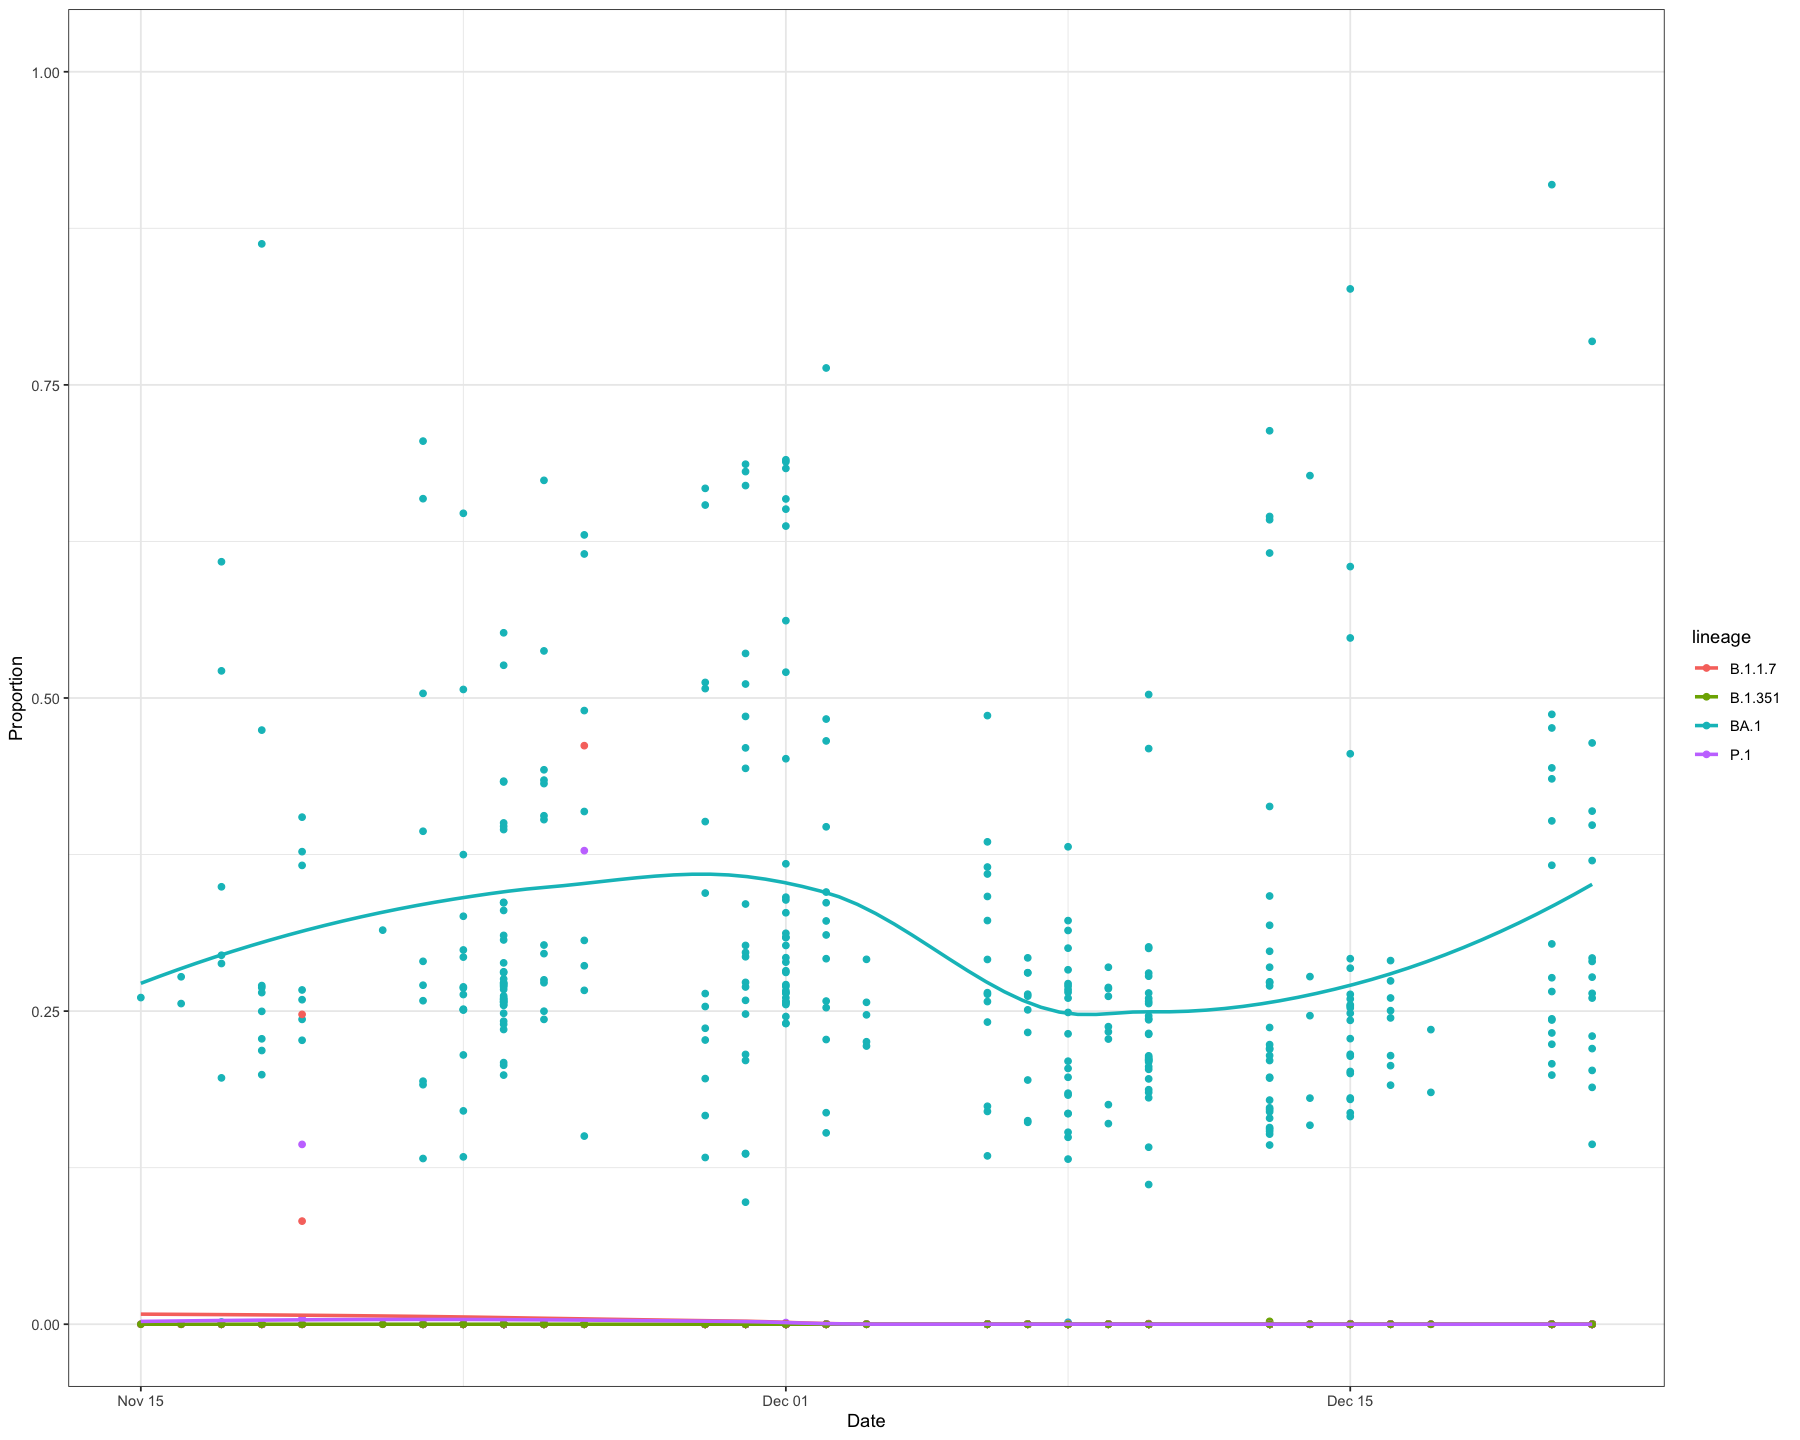

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + #facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
